# Unsupervised learning and Preprocessing

In unsupervised learning, the learning algorithm is just shown the input data
and asked to extract knowledge from this data.

## Types of Unsupervised Learning
We will look into two kinds of unsupervised learning in this chapter: transformations
of the dataset and clustering.

Unsupervised transformations of a dataset are algorithms that create a new representa‐
tion of the data. 
A common
application of unsupervised transformations is dimensionality reduction, which takes
a high-dimensional representation of the data, consisting of many features, and finds
a new way to represent this data that summarizes the essential characteristics with
fewer features.

Clustering algorithms, on the other hand, partition data into distinct groups of similar
items. Consider the example of uploading photos to a social media site. To allow you
to organize your pictures, the site might want to group together pictures that show
the same person. However, the site doesn’t know which pictures show whom, and it
doesn’t know how many different people appear in your photo collection. A sensible
approach would be to extract all the faces and divide them into groups of faces that
look similar. Hopefully, these correspond to the same person, and the images can be
grouped together for you.

### Challenges in Unsupervised Learning

A major challenge in unsupervised learning is evaluating whether the algorithm
learned something useful. 

# Preprocessing and Scaling

In the previous chapter we saw that some algorithms, like neural networks and SVMs,
are very sensitive to the scaling of the data. Therefore, a common practice is to adjust
the features so that the data representation is more suitable for these algorithms.

In [1]:
import mglearn

In [8]:
import numpy as np

In [24]:
from sklearn.model_selection import train_test_split

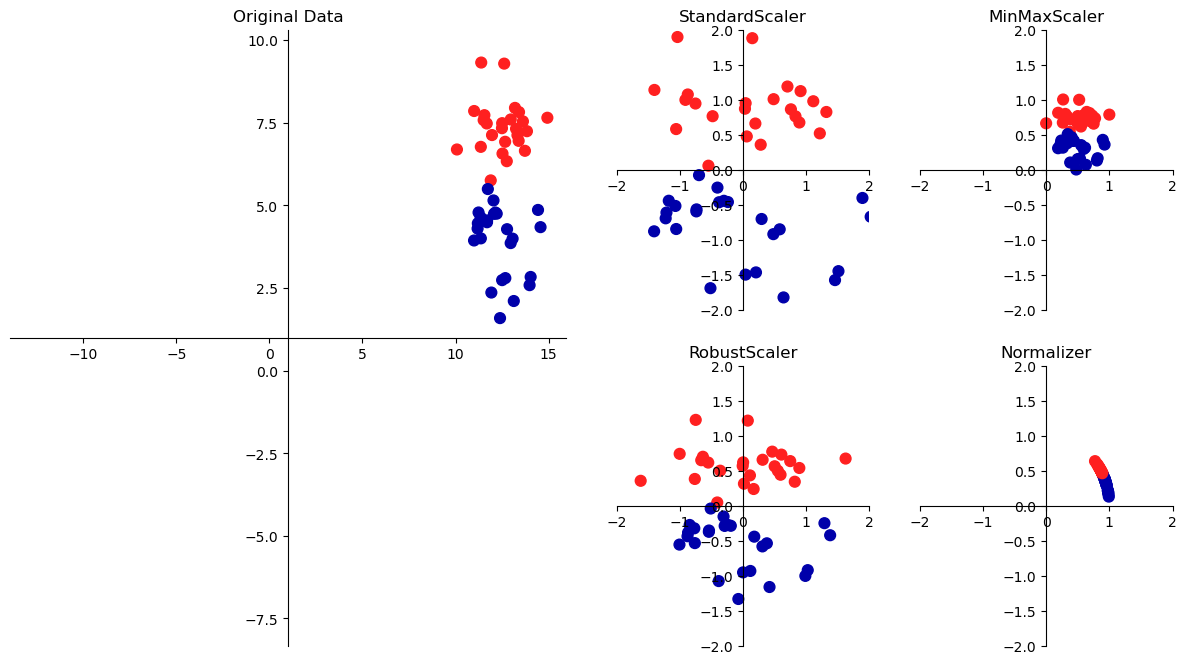

In [2]:
mglearn.plots.plot_scaling()  # Figure 3-1. Different ways to rescale and preprocess a dataset

## Applying Data Transformations
Now that we’ve seen what the different kinds of transformations do, let’s apply them
using scikit-learn. 

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [7]:
cancer = load_breast_cancer()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

In [7]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


    As a reminder, the dataset contains 569 data points, each represented by 30 measurements. We split the dataset into 426 samples for the training set and 143 samples for
    the test set.

    As with the supervised models we built earlier, we first import the class that implements the preprocessing, and then instantiate it

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

    We then fit the scaler using the fit method, applied to the training data. For the Min MaxScaler, the fit method computes the minimum and maximum value of each feature on the training set.
    In contrast to the classifiers and regressors of Chapter 2, the scaler is only provided with the data (X_train) when fit is called, and y_train is not used

In [10]:
scaler.fit(X_train)

MinMaxScaler()

    To apply the transformation that we just learned—that is, to actually scale the training data—we use the transform method of the scaler. The transform method is used in scikit-learn whenever a model returns a new representation of the data:

In [16]:
    # transform data
X_train_scaled = scaler.transform(X_train)
    # print dataset properties before and after scaling
print(f'transformed shape: {X_train_scaled.shape}')
print(f"per-feature minimum before scaling:\n {X_train.min(axis=0)}")
print(f"per-feature maximum before scaling:\n {X_train.max(axis=0)}")
print(f"per-feature minimum after scaling:\n {X_train_scaled.min(axis=0)}")
print(f"per-feature maximum after scaling:\n {X_train_scaled.max(axis=0)}")


transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


    The transformed data has the same shape as the original data—the features are simply shifted and scaled. You can see that all of the features are now between 0 and 1, as desired.
    
    To apply the SVM to the scaled data, we also need to transform the test set. This is again done by calling the transform method, this time on X_test

In [17]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print(f"per-feature minimum after scaling:\n{X_test_scaled.min(axis=0)}")
print(f"per-feature maximum after scaling:\n{X_test_scaled.max(axis=0)}")

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


Maybe somewhat surprisingly, you can see that for the test set, after scaling, the mini‐
mum and maximum are not 0 and 1. Some of the features are even outside the 0–1
range! The explanation is that the MinMaxScaler (and all the other scalers) always
applies exactly the same transformation to the training and the test set. This means
the transform method always subtracts the training set minimum and divides by the
training set range, which might be different from the minimum and range for the test
set.

## Scaling Training and Test Data the Same Way
    It is important to apply exactly the same transformation to the training set and the test set for the supervised model to work on the test set. The following example (Figure 3-2) illustrates what would happen if we were to use the minimum and range of the test set instead

In [3]:
import matplotlib.pyplot as plt

C:\Users\hp\AppData\Local\Temp\ipykernel_6252\3030955255.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_train[:, 0], X_train[:, 1],
C:\Users\hp\AppData\Local\Temp\ipykernel_6252\3030955255.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
C:\Users\hp\AppData\Local\Temp\ipykernel_6252\3030955255.py:23: UserWarning: *c* argument looks like a sing

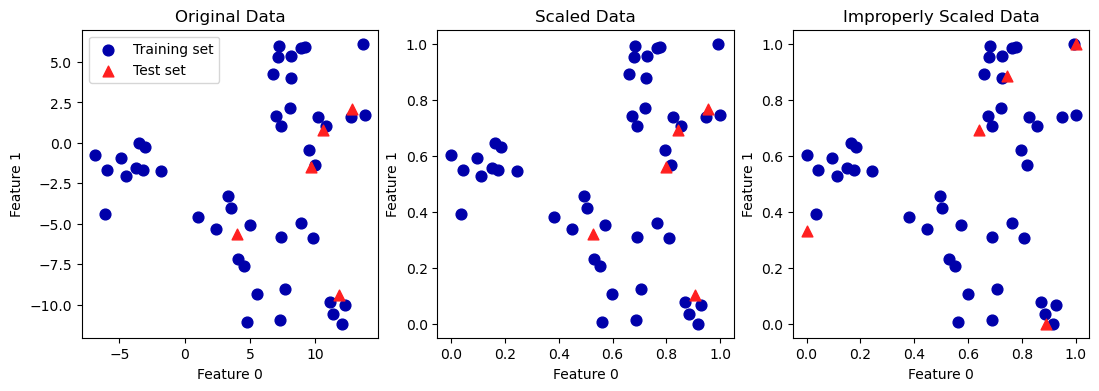

In [21]:
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
 c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
 c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
 c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
 c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)


# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
 c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
 marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
for ax in axes:
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")

## The Effect of Preprocessing on Supervised Learning
    Now let’s go back to the cancer dataset and see the effect of using the MinMaxScaler on learning the SVC (this is a different way of doing the same scaling we did in Chapter 2). First, let’s fit the SVC on the original data again for comparison:

In [26]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100)
svm.fit(X_train, y_train)
print(f"Test set accuracy: {svm.score(X_test, y_test)}")

Test set accuracy: 0.9440559440559441


    Now, let’s scale the data using MinMaxScaler before fitting the SVC:

In [30]:
    # preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

    # learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

    # scoring on the scaled test set
print(f"Scaled test set accuracy: {svm.score(X_test_scaled, y_test)}")


Scaled test set accuracy: 0.965034965034965


    As we saw before, the effect of scaling the data is quite significant. Even though scaling the data doesn’t involve any complicated math, it is good practice to use the scaling mechanisms provided by scikit-learn instead of reimplementing them yourself, as it’s easy to make mistakes even in these simple computations.


    You can also easily replace one preprocessing algorithm with another by changing the class you use, as all of the preprocessing classes have the same interface, consisting of the fit and transform methods

In [31]:
    # preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

    # learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

    # scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


    Now that we’ve seen how simple data transformations for preprocessing work, let’s move on to more interesting transformations using unsupervised learning.

# Dimensionality Reduction, Feature Extraction, and Manifold Learning

    As we discussed earlier, transforming data using unsupervised learning can have many motivations. The most common motivations are visualization, compressing the data, and finding a representation that is more informative for further processing.

    One of the simplest and most widely used algorithms for all of these is principal component analysis. We’ll also look at two other algorithms: non-negative matrix factorization (NMF), which is commonly used for feature extraction, and t-SNE, which is commonly used for visualization using two-dimensional scatter plots.

## Principal Component Analysis (PCA)
    Principal component analysis is a method that rotates the dataset in a way such that the rotated features are statistically uncorrelated. 
    This rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data. 
    The following example (Figure 3-3) illustrates the effect of PCA on a synthetic two-dimensional dataset

In [34]:
from sklearn.decomposition import PCA

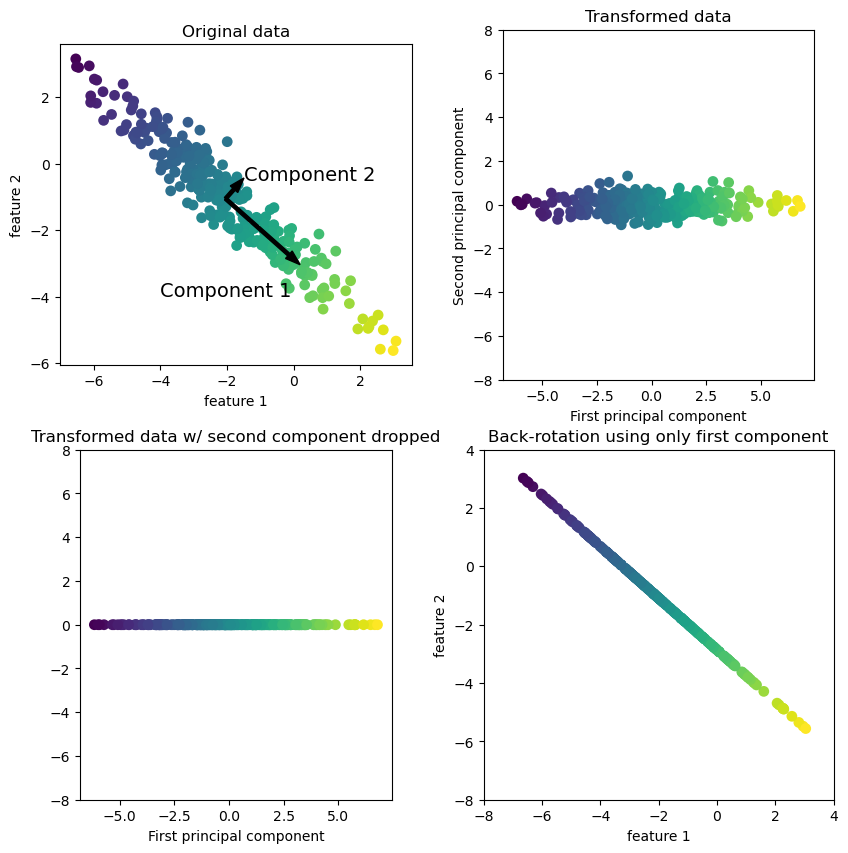

In [2]:
mglearn.plots.plot_pca_illustration()

### Applying PCA to the cancer dataset for visualization
    One of the most common applications of PCA is visualizing high-dimensional datasets.
    As we saw in Chapter 1, it is hard to create scatter plots of data that has more than two features.
    This dataset has 30 features, which would result in 30 * 14 = 420 scatter plots! We’d never be able to look at all these plots in detail, let alone try to understand them.
    

In [9]:
import matplotlib.pyplot as plt
import numpy as np

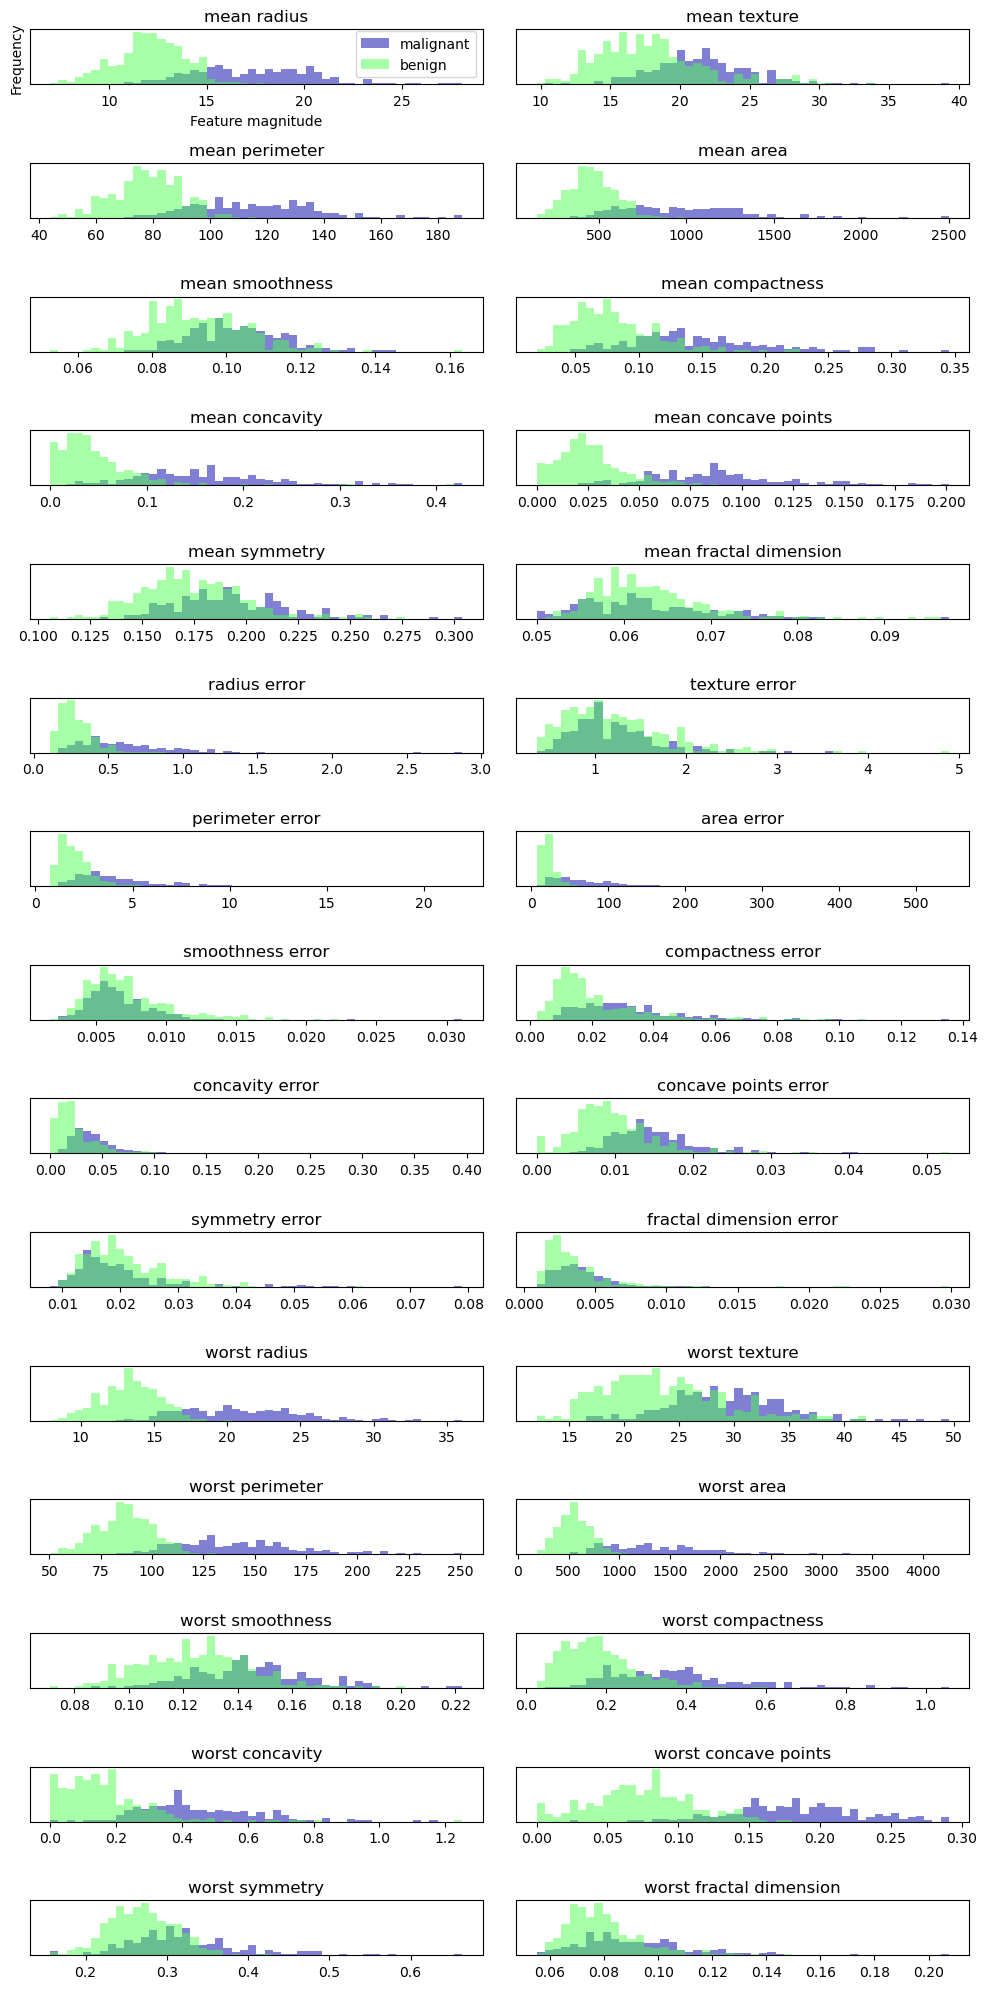

In [10]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
 _, bins = np.histogram(cancer.data[:, i], bins=50)
 ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
 ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
 ax[i].set_title(cancer.feature_names[i])
 ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

    Here we create a histogram for each of the features, counting how often a data point appears with a feature in a certain range
    This gives us some idea of how each feature is distributed across the two classes, and allows us to venture a guess as to which features are better at distinguishing malignant and benign samples.
    For example, the feature “smoothness error” seems quite uninformative, because the two histograms mostly overlap, while the feature “worst concave points” seems quite informative, because the histograms are quite disjoint.

    However, this plot doesn’t show us anything about the interactions between variables and how these relate to the classes.
    Using PCA, we can capture the main interactions and get a slightly more complete picture.
    
    Before we apply PCA, we scale our data so that each feature has unit variance using StandardScaler

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

    Learning the PCA transformation and applying it is as simple as applying a preprocessing transformation
    We instantiate the PCA object, find the principal components by calling the fit method, and then apply the rotation and dimensionality reduction by calling transform. 
    By default, PCA only rotates (and shifts) the data, but keeps all principal components. To reduce the dimensionality of the data, we need to specify how many components we want to keep when creating the PCA object

In [14]:
from sklearn.decomposition import PCA
    # keep the first two principal components of the data
pca = PCA(n_components=2)
    # fit PCA model to breast cancer data
pca.fit(X_scaled)
    # transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


    We can now plot the first two principal components

Text(0, 0.5, 'Second principal component')

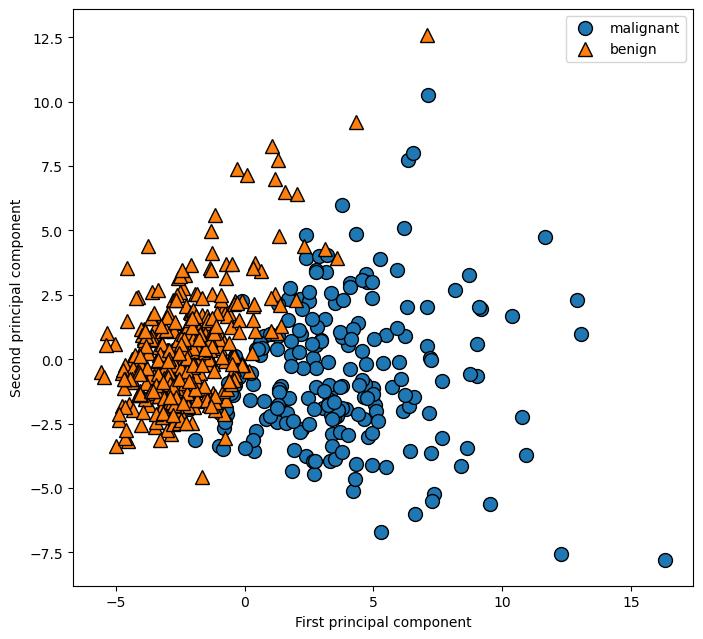

In [15]:
    # plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [16]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


    Each row in components_ corresponds to one principal component, and they are sorted by their importance (the first principal component comes first, etc.). The columns correspond to the original features attribute of the PCA in this example, “mean radius,” “mean texture,” and so on. Let’s have a look at the content of components_

In [18]:
print(f"PCA components:\n{pca.components_}")

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


    We can also visualize the coefficients using a heat map (Figure 3-6), which might be easier to understand:

Text(0, 0.5, 'Principal components')

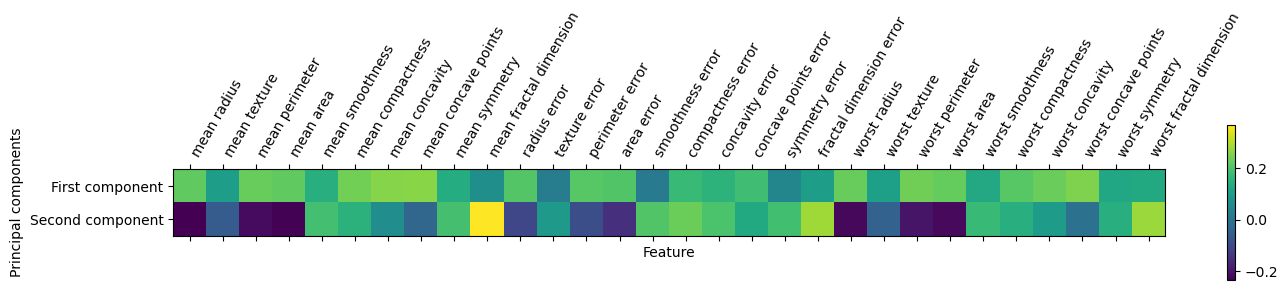

In [20]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
 cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

### Eigenfaces for feature extraction

    Another application of PCA that we mentioned earlier is feature extraction.
    A great example of an application where feature extraction is helpful is with images. Images are made up of pixels, usually stored as red, green, and blue (RGB) intensities.
    Objects in images are usually made up of thousands of pixels, and only together are they meaningful
    
    We will give a very simple application of feature extraction on images using PCA, by working with face images from the Labeled Faces in the Wild dataset.
    This dataset contains face images of celebrities downloaded from the Internet, and it includes faces of politicians, singers, actors, and athletes from the early 2000s.

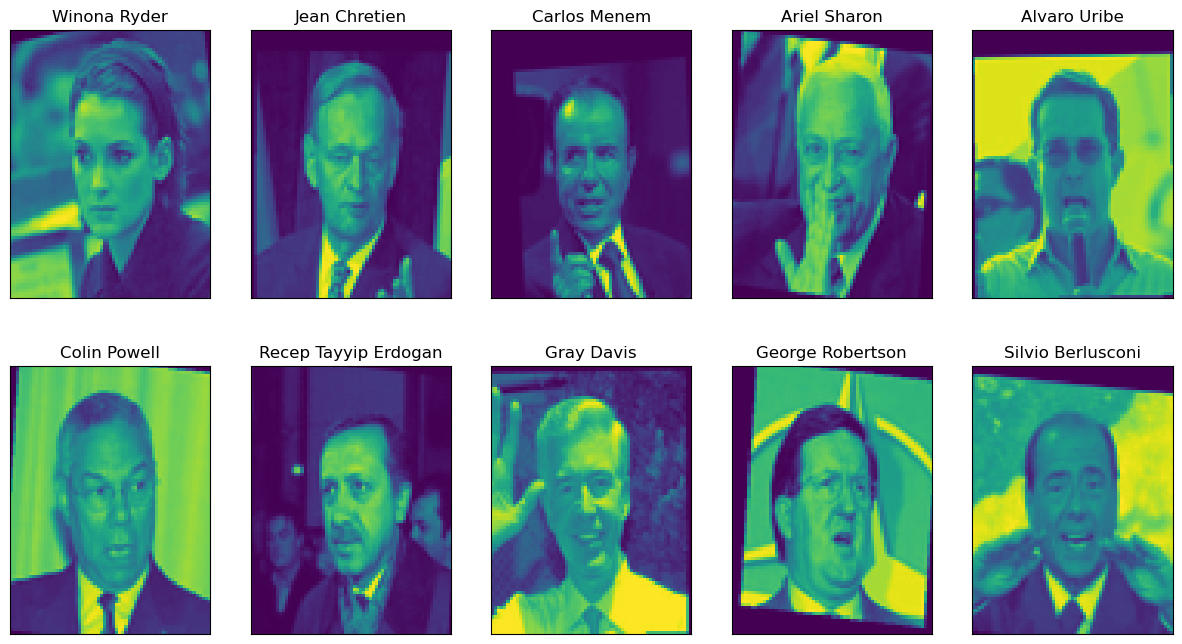

In [6]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
 ax.imshow(image)
 ax.set_title(people.target_names[target])

In [7]:
print(f"People.images.shape: {people.images.shape}")
print(f"Number of classes: {len(people.target_names)}")

People.images.shape: (3023, 87, 65)
Number of classes: 62


In [16]:
    # count how often each target appears
counts = np.bincount(people.target)
    # print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
     print("{0:25} {1:3}".format(name, count), end = ' ')
     if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

    To make the data less skewed, we will only take up to 50 images of each person (otherwise, the feature extraction would be overwhelmed by the likelihood of George W. Bush

In [29]:
mask = np.zeros(people.target.shape, dtype = bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]
    
    # scale the grayscale values to be between 0 and 1
    # instead of 0 and 255 for better numeric stability
X_people = X_people / 255    

    A common task in face recognition is to ask if a previously unseen face belongs to a known person from a database. This has applications in photo collection, social media, and security applications. One way to solve this problem would be to build a
    classifier where each person is a separate class.
    A simple solution is to use a one-nearest-neighbor classifier that looks for the most similar face image to the face you are classifying.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
    # split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify = y_people, random_state=0)
    # build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(f"Test set score of 1-nn: {(knn.score(X_test, y_test))}")

Test set score of 1-nn: 0.14147286821705427


    We obtain an accuracy of 14%, not great.
    This is where PCA comes in. Computing distances in the original pixel space is quite a bad way to measure similarity between faces.
    When using a pixel representation to ompare two images, we compare the grayscale value of each individual pixel to the alue of the pixel in the corresponding position in the other image. An it is ard to capture the facial features using this raw representation
    Eg. using ixel distances means that shifting a face by one pixel to the right corresponds to a drastic change.
    
    We hope that using distances along principal components can improve our accuracy
    Here, we enable thewhitening option of PCA, which rescales the principal components to have the samescale. This is the same as using StandardScaler after the transformation.

    Reusing the data from Figure 3-3 again, whitening corresponds to not only rotating the data, but also rescaling it so that the center panel is a circle instead of an ellipse

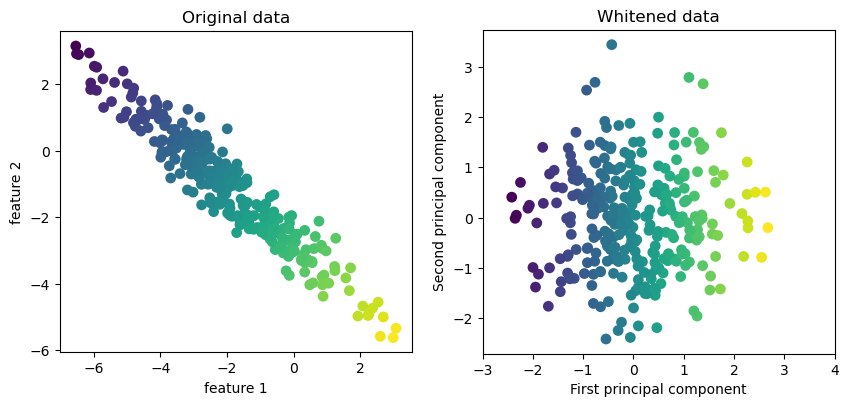

In [31]:
mglearn.plots.plot_pca_whitening()

    We fit the PCA object to the training data and extract the first 100 principal components. Then we transform the training and test data.

In [35]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"X_train_pca.shape: {X_train_pca.shape:}")

X_train_pca.shape: (1547, 100)


    The new data has 100 features, the first 100 principal components. Now, we can use the new representation to classify our images using a one-nearest-neighbors classifier

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print(f"Test set accuracy: {knn.score(X_test_pca, y_test)}")

Test set accuracy: 0.1511627906976744


        Our accuracy improved from 14% to 15%
        
        For image data, we can also easily visualize the principal components that are found.
        The input space here is 50×37-pixel grayscale images, so directions within this space are also 50×37-pixel grayscale images.

In [38]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


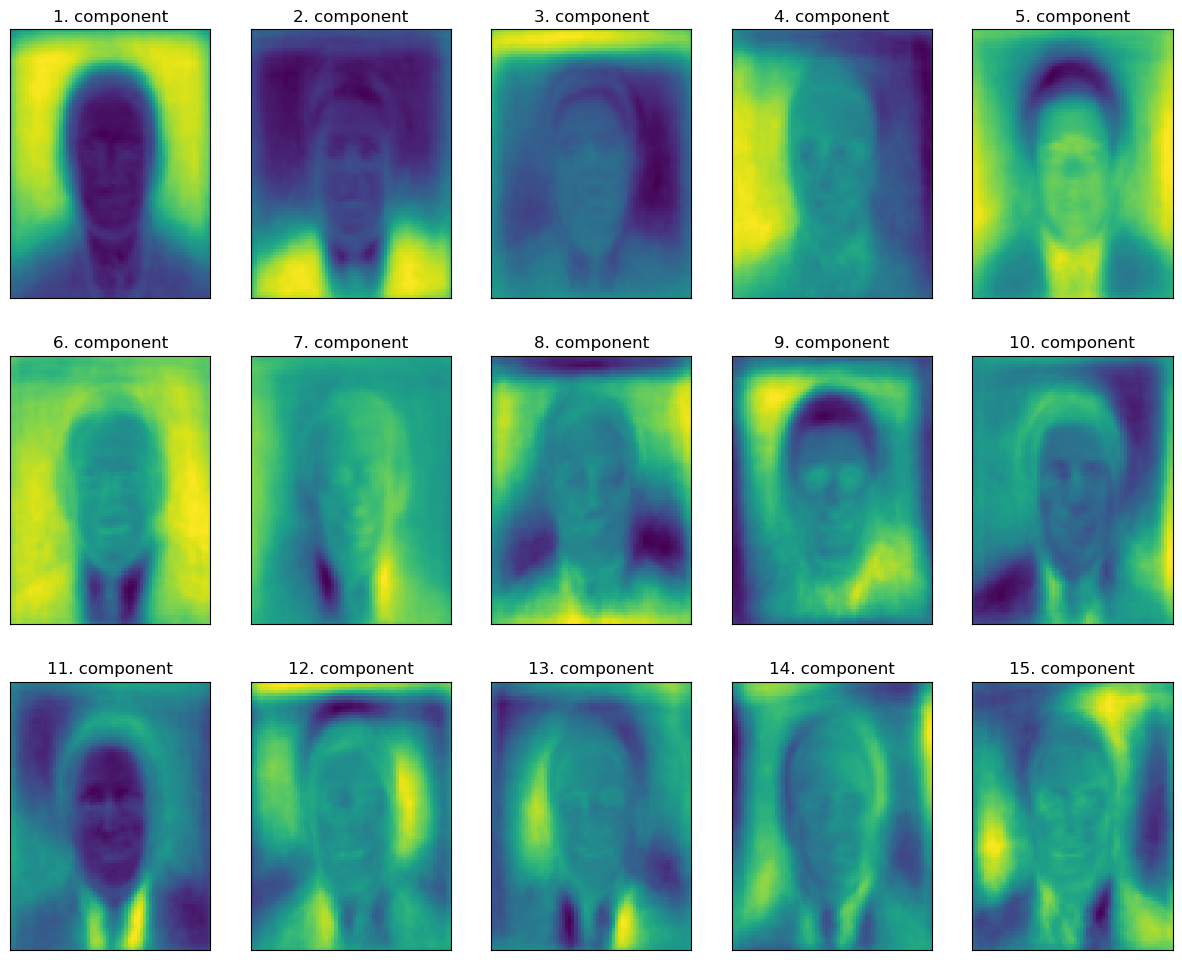

In [39]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
 subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
 ax.imshow(component.reshape(image_shape),
 cmap='viridis')
 ax.set_title("{}. component".format((i + 1)))

    We can also try to use PCA to visualize all the faces in the dataset in a scatter plot using the first two principal components with classes given by who is shown in the image, similarly to what we did for the cancer dataset

Text(0, 0.5, 'Second principal component')

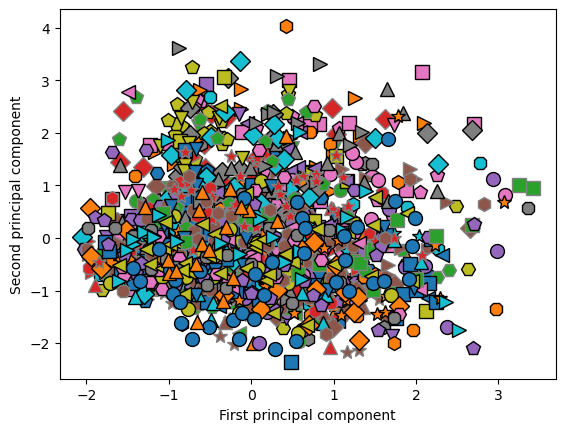

In [42]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")